<a href="https://colab.research.google.com/github/chimaobi-okite/Insurance-Prediction/blob/main/Insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement



Recently, there has been an increase in the number of building collapse in Lagos and major cities in Nigeria. Olusola Insurance Company offers a building insurance policy that protects buildings against damages that could be caused by a fire or vandalism, by a flood or storm.

You have been appointed as the Lead Data Analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not. You will have to predict the probability of having at least one claim over the insured period of the building.

The model will be based on the building characteristics. The target variable, Claim, is a:

- 1 if the building has at least a claim over the insured period.
- 0 if the building doesn’t have a claim over the insured period.

### Personal Objective

To understand how to build custom transformers

## Get The Data

Import the necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the csv files containing the data

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Insurance-Prediction/main/train_data.csv')
test_data =  pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Insurance-Prediction/main/test_data.csv')
variable_description = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Insurance-Prediction/main/VariableDescription.csv')
sample_sub = pd.read_csv('https://raw.githubusercontent.com/chimaobi-okite/Insurance-Prediction/main/SampleSubmission.csv')

## Explore The Train Data (EDA)

Create of copy of the train_data for analysis

In [ ]:
train = train_data.copy()

Lets have a feel of the train_data and variable description

In [ ]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
variable_description

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


Get info of the traing data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [ ]:
train.shape

(7160, 14)

Get a distribution Of the data

In [ ]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


Lets take a closer look at the Building Dimension, it seems to have outlier values

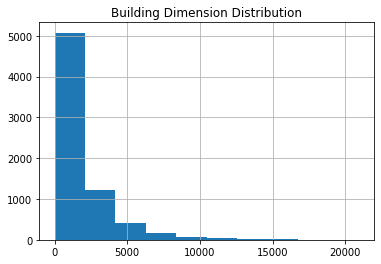

In [ ]:
train['Building Dimension'].hist()
plt.title('Building Dimension Distribution')
plt.show()

 Looking at the plot above, building dimension is greatly skewed to the right, we might want to normalize it when modeling

**Next check for correlation in the data**
This is to see variables that are correlated with each other 

In [ ]:
train.corr()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.009128,0.005490,-0.029492,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.007473,-0.017811,-0.003445,0.088715
Residential,-0.040391,-0.037620,1.000000,0.057481,0.334039,-0.042058,0.063509
Building Dimension,0.009128,0.007473,0.057481,1.000000,0.007935,0.207624,0.297089
Building_Type,0.005490,-0.017811,0.334039,0.007935,1.000000,-0.146608,0.112168
Date_of_Occupancy,-0.029492,-0.003445,-0.042058,0.207624,-0.146608,1.000000,0.019170
Claim,-0.016367,0.088715,0.063509,0.297089,0.112168,0.019170,1.000000


**Check for columns with missing values**

create function that the percentage of missing values in each column that contains missing value

In [ ]:
def plot_missing(data):
  if data.isnull().sum().sum() != 0:
    missing = data.isnull().sum()[data.isnull().sum() != 0].sort_values()
    size = data.shape[0]
    index = missing.index
    values = missing.values
    fig, ax = plt.subplots()
    ax.barh(index, values)
    ax.set_xlabel('Number of missing values')
    ax.set_ylabel('Column')
    plt.title("Percentage Of Missing Values in Data")

    for p in ax.patches:
      height, width = p.get_height(), p.get_width()
      label = '{}%.'.format(round(width/size, 2))
      x = width
      y = p.get_y() + height/2
      ax.annotate(label,(x,y))

    else:
      print('The dataframe contains no missing values')




The dataframe contains no missing values


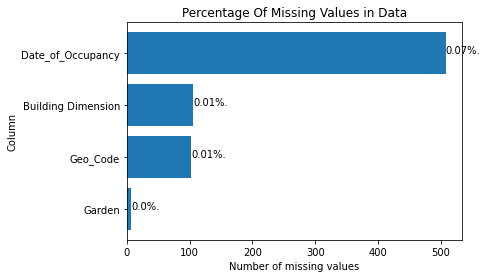

In [ ]:
plot_missing(train)

Explore Target Variable

See The Number of each count in the target

Plot the resulting series

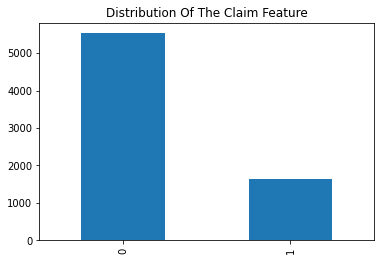

In [ ]:
train.Claim.value_counts().plot.bar()
plt.title('Distribution Of The Claim Feature')
plt.show()

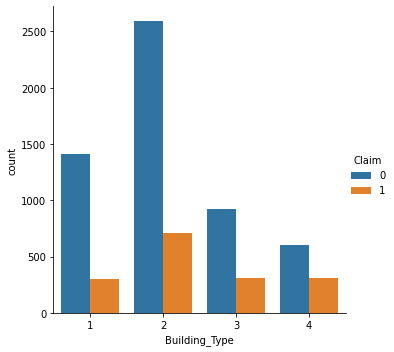

In [ ]:
sns.catplot(data =train,x='Building_Type', hue='Claim',kind='count')

Explore the Geo_code Object model

In [ ]:
train.Geo_Code.value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
59650      1
59656      1
60057      1
60172      1
2B353      1
Name: Geo_Code, Length: 1307, dtype: int64

The data has NumberOfWindows column as an object, Lets explore this column

In [ ]:
train.NumberOfWindows.value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

Explore new features, maybe Age of property as YearOfObservation - Date_of_Occupancy 

In [ ]:
train['Age'] = train['YearOfObservation'] - train['Date_of_Occupancy']

Text(0.5, 1.0, 'Scatter Distribution Of Age Against Claim')

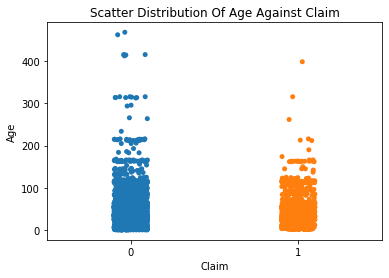

In [ ]:
## see the distribution of age with respect to claim
sns.stripplot(x='Claim',y= 'Age',data = train)
plt.title('Scatter Distribution Of Age Against Claim')

Text(0.5, 1.0, 'Scatter Distribution Of Building Dimensions')

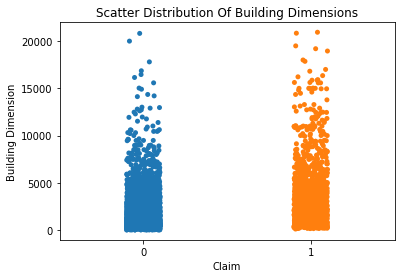

In [ ]:
sns.stripplot(y='Building Dimension',x=  'Claim', data = train)
plt.title('Scatter Distribution Of Building Dimensions')

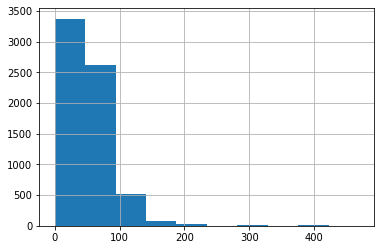

In [ ]:
train['Age'].hist()

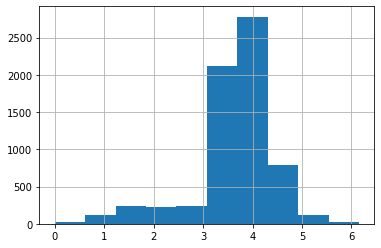

In [ ]:
(np.log(train['Age'] + 1)).hist()

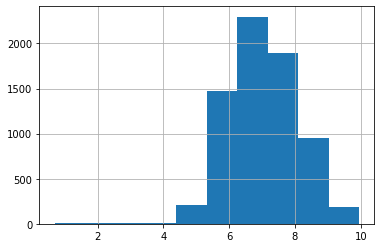

In [ ]:
(np.log(train['Building Dimension'] + 1)).hist()

### Summary Of EDA


*   Date_Of_Occupancy had most missing values
*   The target column 'Claim' is highly imbalance, with the positive class being less than 30% of the whole dataset 
*   Most buildings in the dataset is of type 2
*   The probability of a building with age above 200 having an insurance claim is very minimial
*   More of the building abovewith dimension above 10000 have insurance claims




## Data Preparation For Modelling

From the EDA:- 

*   The dataset contains a combination of both categorical and numerical columns
*   Some most object datatype columns require onehotencoding while the number of windows require ordinal encoding
*   Some columns contains misssing values, it will be nice to fill the missing values with median for numerical columns and mode for categorical columns
*   The building dimension column might require some feature transformation
*   It will necessary to perform feature generation , Age

It will nice to create a transformation pipeline for the all the preprocessing steps. This approach keeps the code base neat and helps aviod data snooping on the test set.



Import the necessary libraries for preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

Create a copy of the data for preprocessing, then divide the data to features and labels set

In [ ]:
train_2 = train_data.copy()

In [ ]:
X_train = train_2.drop('Claim',axis = 1)
y_train = train_2['Claim']

Divide the train set to catgorical and numerical column, for the catigorical column, we will fil the missing value with the mode while for the numerical columns, we will fill the missing value with the median

In [ ]:
num_attris = [num for num in X_train.columns if X_train[num].dtype == 'float64'] + ['YearOfObservation']
num_attris

['Insured_Period',
 'Building Dimension',
 'Date_of_Occupancy',
 'YearOfObservation']

In [ ]:
cat_attris_1 = ['Residential','Building_Painted','Building_Fenced','Garden','Settlement','Building_Type']
cat_attris_2 = ['NumberOfWindows']

Create a custom class that creates a new feature 'age', and also log transforms the building_dimension and age

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
building_dimension_ix, date_of_occupancy_ix, year_of_observation_ix = 1,2,3
class MyCustomTransfomer(BaseEstimator, TransformerMixin):

  def __init__(self,log_transform = True):
    self.log_transform = log_transform

  def fit(self, X, y= None):
    return self

  def transform(self, X, y=None):
    property_age = X[:, year_of_observation_ix] - X[:, date_of_occupancy_ix]
    if self.log_transform:
      X[:building_dimension_ix] = np.log(X[:building_dimension_ix] + 1)
      property_age = np.log(property_age + 1)
      return np.c_[X,property_age]
    else:
      return np.c_[X,property_age]


Create a transformer pipeline for the num_attributes

First create one with log_transform = True
and another with log_transform = False . This will help compare the performance of our model to log transformation

In [ ]:
num_pipe_1 = Pipeline([('imputer', SimpleImputer(strategy= 'median')),
                     ('mycustomtransformer',MyCustomTransfomer(log_transform = True)),
                     ('std_scaler', MinMaxScaler())])

In [ ]:
num_pipe_2 = Pipeline([('imputer', SimpleImputer(strategy= 'median')),
                     ('mycustomtransformer',MyCustomTransfomer(log_transform = False)),
                     ('std_scaler', MinMaxScaler())])

Create a transformer pipeline for object columns that require onehot encoding

In [ ]:
cat_one_pipe = Pipeline([('imputer', SimpleImputer(strategy= 'most_frequent')),
                         ('encode', OneHotEncoder())])

Create a transformer Pipeline for the NumberOfWindows column that requires ordinal encoding

In [ ]:
cat_two_pipe = Pipeline([('imputer', SimpleImputer(strategy= 'most_frequent')),
                         ('encode', OrdinalEncoder()),
                         ('scale', MinMaxScaler())])

Next implement a colum transformer to perform the # transformations above on the train data

In [ ]:
full_pipe_1 = ColumnTransformer([('num',num_pipe_1, num_attris),
                               ('cat_1', cat_one_pipe, cat_attris_1),
                               ('cat_2', cat_two_pipe, cat_attris_2)])

In [ ]:
full_pipe_2 = ColumnTransformer([('num',num_pipe_2, num_attris),
                               ('cat_1', cat_one_pipe, cat_attris_1),
                               ('cat_2', cat_two_pipe, cat_attris_2)])

In [ ]:
data_prepared_1 = full_pipe_1.fit_transform(X_train)
data_prepared_2 = full_pipe_2.fit_transform(X_train)

## Model Building

Import the necessary Labraries for modelling

**Note** : roc_auc will be used as base metrics for validation as this competition uses it for ranking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Create a vaidation function that performs validation on the various models and returns the mean_score and standard_deviation for that model

In [ ]:
def validate(estimator,X,y) :
  scores = cross_val_score(estimator,X,y,scoring='roc_auc',cv= 5).mean()
  print('The mean score is {}'.format(scores.mean()))
  print('The std is {}'.format(scores.std()))

#### Make Prediction On BaseModel

Create a base model that predicts all Negative class and check for the accuracy, we can achieve this via a class

In [ ]:
class BaseModel :
  def __init__(self):
    pass
    
  def fit(self, X, y):
    return type(self).__name__+ '()'

  def predict(self, X):
    size = X.shape[0]
    return np.full(size, 0)


Create an instance of the base model and make predictions on it 

In [ ]:
base_model = BaseModel()
base_model.fit(data_prepared_1, y_train)


'BaseModel()'

In [ ]:
y_base_pred = base_model.predict(data_prepared_1)

In [ ]:
## check the roc-auc
accuracy_score(y_train, y_base_pred)

0.7717877094972067

#### Build a LogisticRegression Model

In [ ]:
log_model = LogisticRegression(max_iter=1000)

first fit the data_prepared_1 and then on data_prepared_2 and compare thier accuracies

In [ ]:
log_model.fit(data_prepared_1,y_train)
accuracy_score(y_train,log_model.predict(data_prepared_1))

0.7868715083798883

In [ ]:
log_model.fit(data_prepared_1,y_train)
roc_auc_score(y_train,log_model.predict_proba(data_prepared_1)[:,1])

0.7148843167560849

In [ ]:
log_model.fit(data_prepared_2,y_train)
roc_auc_score(y_train,log_model.predict_proba(data_prepared_2)[:,1])

0.71394760763738

In [ ]:
## Validate logistics model
validate(log_model,data_prepared_1,y_train)

The mean score is 0.7124951421802863
The std is 0.0


From the above, the logistics regression model performs better than the base model and the data with log transformation performs slightly better than the one without, therefore it will be okay to use data_prepared_1 as x_train

#### Build Model With DecisionTreeClassifier


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)
tree_model.fit(data_prepared_1,y_train)
roc_auc_score(y_train, tree_model.predict_proba(data_prepared_1)[:,1])

0.7151823958046772

In [ ]:
## Validate tree model
validate(tree_model,data_prepared_1,y_train)

The mean score is 0.6855274252384876
The std is 0.0


#### Build Model With RandomForestClassifier

In [ ]:
rand_model = RandomForestClassifier(random_state= 42,n_estimators=500,max_depth=5)
rand_model.fit(data_prepared_1,y_train)
roc_auc_score(y_train, rand_model.predict_proba(data_prepared_1)[:,1])

0.7418895143952855

In [ ]:
## Validate random_forest model
validate(rand_model,data_prepared_1,y_train)

The mean score is 0.7064539511305448
The std is 0.0


#### Build Model with XGBClassifier

In [ ]:
xgb_model = XGBClassifier(max_depth=3, random_state = 42, n_estimators=100)
xgb_model.fit(data_prepared_1,y_train)
roc_auc_score(y_train,xgb_model.predict_proba(data_prepared_1)[:,1])

0.758740477307452

In [ ]:
## Validate XGB model
validate(xgb_model,data_prepared_1,y_train)

The mean score is 0.7137230548871935
The std is 0.0
